**Importing Libraries**

In [ ]:
import pandas as pd
import torch
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings


settling dataset

In [ ]:
df = pd.read_csv("/content/Updated Dataset for  Customer_Product_Review - Sheet1 - Dataset for  Customer_Product_Review - Sheet1.csv")
#

For First Five Tuples

In [ ]:
df.head()

,product_id,product_name,brand,website,source_URL,review_title,review_text,reviewer_name,rating
0,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,Worst mobile,Worst display quality😩😩,PHALAKSHA,1
1,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,Average mid-range phone,Battery is good but not great as advertised.Ru...,Snehith,3
2,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,"Bulky, and Back side chrome finish is faulty",Back side chrome finish started like scratches...,Pro-tan International,4
3,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,Good product with some drawback,Battery life is extraordinary. No need of carr...,sai krishna,4
4,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,The best phone you could buy,"I'm writing review after year of purchase , ev...",vicky,5


For Last Five Tuples

In [ ]:
df.tail()

,product_id,product_name,brand,website,source_URL,review_title,review_text,reviewer_name,rating
1690,B08FN6WGDQ,Samsung Galaxy Buds Live Bluetooth Truly Wirel...,Samsung,Amazon,https://www.amazon.in/Samsung-Galaxy-SM-R180NZ...,"One advice, You'll probably need 1 week to kno...",This one is open ear style buds and devs focus...,Harsh Bhogayata,4
1691,B08FN6WGDQ,Samsung Galaxy Buds Live Bluetooth Truly Wirel...,Samsung,Amazon,https://www.amazon.in/Samsung-Galaxy-SM-R180NZ...,Great purchase,Nice product just a little battery problem,Abhinav Tiwari,4
1692,B08FN6WGDQ,Samsung Galaxy Buds Live Bluetooth Truly Wirel...,Samsung,Amazon,https://www.amazon.in/Samsung-Galaxy-SM-R180NZ...,Good sound quality and very easy to use,Good sound quality and very easy to use\n Quic...,Abheek Banerjee,4
1693,B08FN6WGDQ,Samsung Galaxy Buds Live Bluetooth Truly Wirel...,Samsung,Amazon,https://www.amazon.in/Samsung-Galaxy-SM-R180NZ...,Great Sound,I bought it for 4490 and fully satisfied with ...,Aditi,4
1694,B08FN6WGDQ,Samsung Galaxy Buds Live Bluetooth Truly Wirel...,Samsung,Amazon,https://www.amazon.in/Samsung-Galaxy-SM-R180NZ...,Go for it,"I have been using them since more than 1Year, ...",Tousif,4


Missing Value Ratio And all other info

In [ ]:
def missing_values_analysis(df):
  na_columns_ = [col for col in df.columns if df[col].isnull().sum() > 0]
  n_miss =df[na_columns_].isnull().sum().sort_values (ascending=True) 
  ratio_ = (df[na_columns_].isnull().sum() /df.shape[0]* 100).sort_values (ascending=True)
  missing_df = pd.concat([n_miss, np.round(ratio_, 2)], axis =1, keys=['Missing Values', 'Ratio'])
  missing_df = pd.DataFrame(missing_df) 
  return missing_df

def check_dataframe(df, head = 5, tail=5):
  print("SHAPE".center(82,'*'))
  print('Rows: {}'.format(df.shape[0]))
  print('columns: {}'.format(df.shape[1]))
  print("TYPES".center(82,'*'))
  print(df.info())
  print("".center(82,'*'))
  print(missing_values_analysis(df))
  # print("Duplicated Values".center(83,'*'))
  # print(df.duplicated().sum())
  # print("Quantiles".center(82,'*'))
  # print(df.quantile([0,0.05,0.50,0.95,0.99,1]).T)

check_dataframe(df)

**************************************SHAPE***************************************
Rows: 1695
columns: 9
**************************************TYPES***************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     1657 non-null   object
 1   product_name   1695 non-null   object
 2   brand          1694 non-null   object
 3   website        1695 non-null   object
 4   source_URL     1695 non-null   object
 5   review_title   1687 non-null   object
 6   review_text    1651 non-null   object
 7   reviewer_name  1687 non-null   object
 8   rating         1667 non-null   object
dtypes: object(9)
memory usage: 119.3+ KB
None
**********************************************************************************
               Missing Values  Ratio
brand                       1   0.06
review_title                8

In [ ]:
# duplicateRows = df[df.duplicated()]
# duplicateRows

UNIQUE VALUES

In [ ]:
def check_class(dataframe):
  nunique_df = pd.DataFrame({'Variable': dataframe.columns,
                              'Classes': [dataframe[i].nunique() for i in dataframe.columns]})
  nunique_df = nunique_df.sort_values('Classes',ascending = False)
  nunique_df = nunique_df.reset_index(drop = True)
  return nunique_df

check_class(df)

,Variable,Classes
0,reviewer_name,811
1,review_text,798
2,review_title,687
3,source_URL,86
4,product_id,81
5,product_name,73
6,brand,8
7,rating,6
8,website,2


Missing value Table

<Figure size 1800x1440 with 0 Axes>

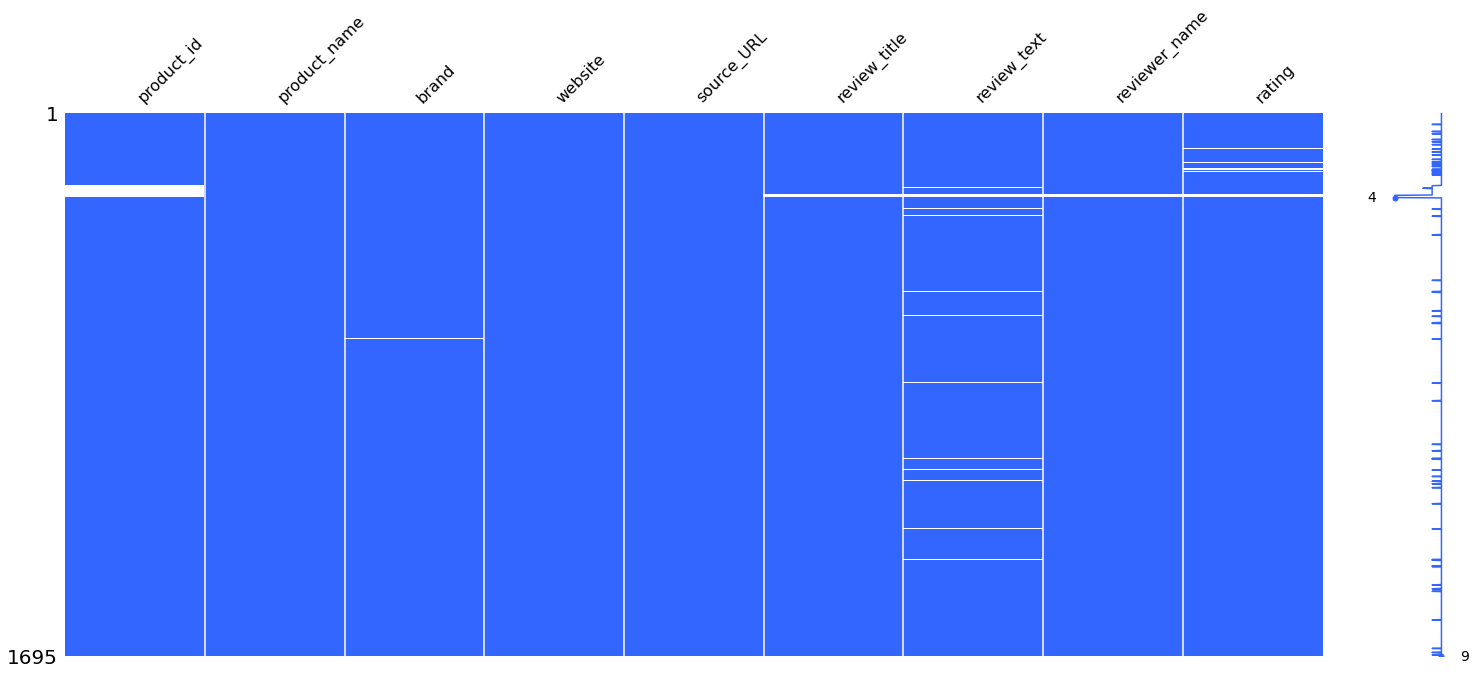

In [ ]:
import missingno as msno
plt.figure(figsize=(25, 20))
msno.matrix(df, color=[0.2, 0.4, 1])
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     1657 non-null   object
 1   product_name   1695 non-null   object
 2   brand          1694 non-null   object
 3   website        1695 non-null   object
 4   source_URL     1695 non-null   object
 5   review_title   1687 non-null   object
 6   review_text    1651 non-null   object
 7   reviewer_name  1687 non-null   object
 8   rating         1667 non-null   object
dtypes: object(9)
memory usage: 119.3+ KB


Handling Missing Values by dropping it!!

In [ ]:
df.dropna(inplace=True, axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1601 entries, 0 to 1694
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     1601 non-null   object
 1   product_name   1601 non-null   object
 2   brand          1601 non-null   object
 3   website        1601 non-null   object
 4   source_URL     1601 non-null   object
 5   review_title   1601 non-null   object
 6   review_text    1601 non-null   object
 7   reviewer_name  1601 non-null   object
 8   rating         1601 non-null   object
dtypes: object(9)
memory usage: 125.1+ KB


handling missing values :

<Figure size 1800x1440 with 0 Axes>

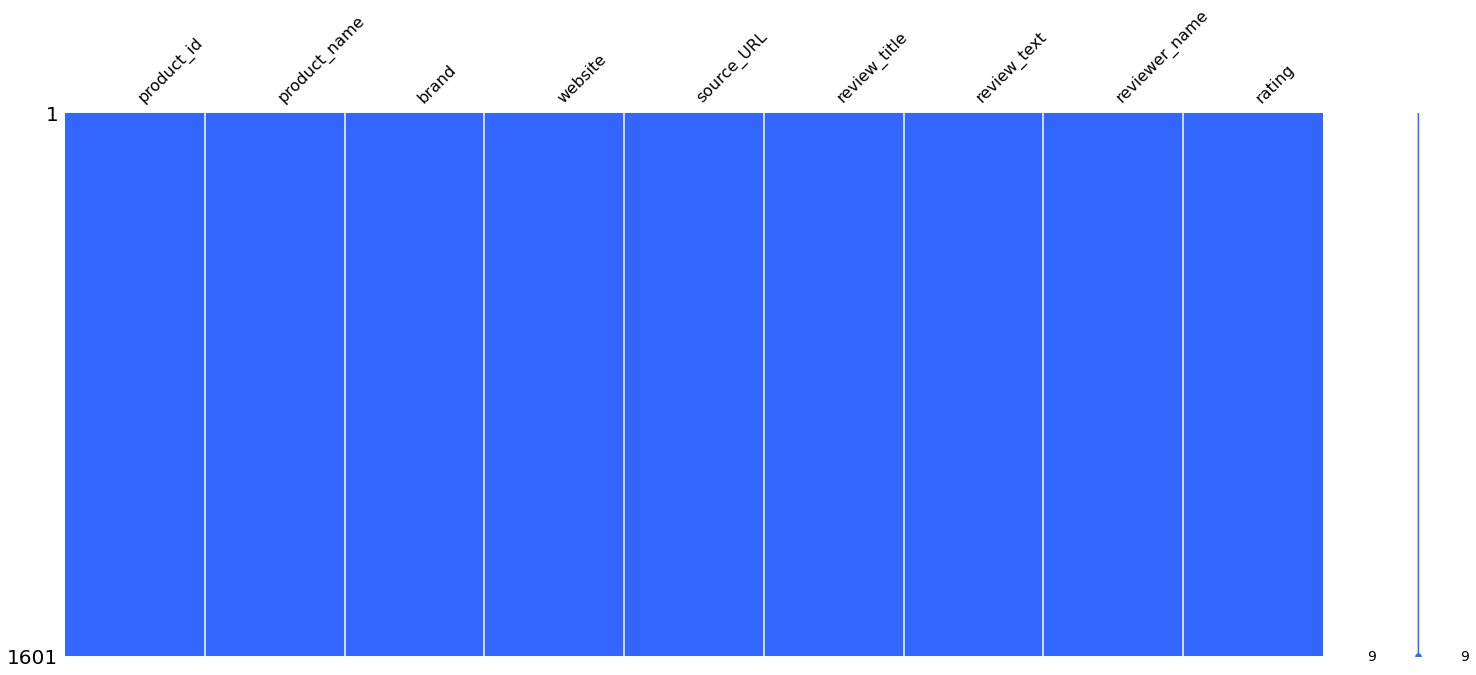

In [ ]:
import missingno as msno
plt.figure(figsize=(25, 20))
msno.matrix(df, color=[0.2, 0.4, 1])
plt.show()

Unicode Normalization (Different Fonts ko same font mai lana  i.e. Constant font mai lana)

In [ ]:
# import re


# def remove_url(review_text):
#     text_ab = re.sub(r"http\S+", "", review_text)
#     return text_ab

# sample = remove_url(sample)
# print(f"Text after removing url:- \n {sample}")

import unicodedata as uni
sample=format(df.review_text)
print(f"Text before Unicode Normalization:- \n {sample}")

sample = uni.normalize('NFKD', sample)
print(f"Text after Unicode Normalization:- \n {sample}")


Text before Unicode Normalization:- 
 0                                 Worst display quality😩😩
1       Battery is good but not great as advertised.Ru...
2       Back side chrome finish started like scratches...
3       Battery life is extraordinary. No need of carr...
4       I'm writing review after year of purchase , ev...
5       Phone doesn't feel slow or sluggish. A decent ...
6       In Short I say I don't like this mobile Bcoz t...
7       STopped working 3 days after return window clo...
8       Samsung Galaxy M01 Core 2GB 32GB is a decent d...
9       Samsung Galaxy M01 Core is Worst Phone purchas...
10      This phone of mine... suddenly the screen got ...
11      My review is after 11month,, doesn't catch fin...
12      Around price 26k to 28k it is value for money....
13      I am using this mobile, I love this mobile S p...
14      Well i bought the phone for the s pen and it d...
15      the phone is good-looking and fast but the bat...
16      The phone which came in is

for recognizing emoji we need to install demoji

In [ ]:
!pip install demoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df.review_text

0                                 Worst display quality😩😩
1       Battery is good but not great as advertised.Ru...
2       Back side chrome finish started like scratches...
3       Battery life is extraordinary. No need of carr...
4       I'm writing review after year of purchase , ev...
5       Phone doesn't feel slow or sluggish. A decent ...
6       In Short I say I don't like this mobile Bcoz t...
7       STopped working 3 days after return window clo...
8       Samsung Galaxy M01 Core 2GB 32GB is a decent d...
9       Samsung Galaxy M01 Core is Worst Phone purchas...
10      This phone of mine... suddenly the screen got ...
11      My review is after 11month,, doesn't catch fin...
12      Around price 26k to 28k it is value for money....
13      I am using this mobile, I love this mobile S p...
14      Well i bought the phone for the s pen and it d...
15      the phone is good-looking and fast but the bat...
16      The phone which came in is good, all the origi...
17      Phone 

Handling Emoji in Review Text

In [ ]:
import demoji


def handle_emoji(string):
    emojis = demoji.findall(string)

    for emoji in emojis:
        string = string.replace(emoji, " " + emojis[emoji].split(":")[0])

    return string


sample=format(df.review_text)

print(f"Before Handling emoji:- \n {sample}")
print(f"After Handling emoji:- \n {handle_emoji(sample)}")

# print("Before Handling emoji:- \n {}"))
# print("After Handling emoji:- \n {}")

Before Handling emoji:- 
 0                                 Worst display quality😩😩
1       Battery is good but not great as advertised.Ru...
2       Back side chrome finish started like scratches...
3       Battery life is extraordinary. No need of carr...
4       I'm writing review after year of purchase , ev...
5       Phone doesn't feel slow or sluggish. A decent ...
6       In Short I say I don't like this mobile Bcoz t...
7       STopped working 3 days after return window clo...
8       Samsung Galaxy M01 Core 2GB 32GB is a decent d...
9       Samsung Galaxy M01 Core is Worst Phone purchas...
10      This phone of mine... suddenly the screen got ...
11      My review is after 11month,, doesn't catch fin...
12      Around price 26k to 28k it is value for money....
13      I am using this mobile, I love this mobile S p...
14      Well i bought the phone for the s pen and it d...
15      the phone is good-looking and fast but the bat...
16      The phone which came in is good, all t

For Polarity Subjectivity

In [ ]:
pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sys
!{sys.executable} - m pip install textblob

Python 3.7.15 (default, Oct 12 2022, 19:14:55) 
[GCC 7.5.0] on linux
Type "help", "copyright", "credits" or "license" for more information.
>>> ^C
  File "<stdin>", line 1
    ^C
    ^
SyntaxError: invalid syntax
>>> 

KeyboardInterrupt
>>> 
KeyboardInterrupt
>>> ^C


***SPELLING CORRECTION ***

In [ ]:
from textblob import TextBlob
import nltk
a=format(df.review_text)
b = TextBlob(a)

# prints the corrected spelling
print("corrected text: "+str(b.correct()))
print(df)


corrected text: 0                                 Worst display quality😩😩
1       Battery is good but not great as advertised.U...
2       Back side come finish started like scratches...
3       Battery life is extraordinary. To need of care...
4       I'm writing review after year of purchase , ev...
5       Shone doesn't feel slow or sluggish. A decent ...
6       In Short I say I don't like this mobile Icon t...
7       stopped working 3 days after return window clot...
8       Samsung Galaxy M01 More 2GB 32GB is a decent d...
9       Samsung Galaxy M01 More is Worst Shone purchase...
10      His phone of mine... suddenly the screen got ...
11      By review is after month,, doesn't catch in...
12      Round price ask to ask it is value for money....
13      I am using this mobile, I love this mobile S p...
14      Well i bought the phone for the s pen and it d...
15      the phone is good-looking and fast but the bat...
16      The phone which came in is good, all the origin...
17 

In [ ]:
df.head()

,product_id,product_name,brand,website,source_URL,review_title,review_text,reviewer_name,rating
0,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,Worst mobile,Worst display quality😩😩,PHALAKSHA,1
1,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,Average mid-range phone,Battery is good but not great as advertised.Ru...,Snehith,3
2,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,"Bulky, and Back side chrome finish is faulty",Back side chrome finish started like scratches...,Pro-tan International,4
3,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,Good product with some drawback,Battery life is extraordinary. No need of carr...,sai krishna,4
4,B085J1J32G,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",Samsung,Amazon,https://amzn.eu/d/bOFfVHI,The best phone you could buy,"I'm writing review after year of purchase , ev...",vicky,5


all Upper Case Letters to Lower Case Letters

In [ ]:
def word_tokenizer(text):
    text = text.lower()
    text = text.split()

    return text

sample=format(df.review_text)
print(sample)
print(word_tokenizer(sample))


0                                 Worst display quality😩😩
1       Battery is good but not great as advertised.Ru...
2       Back side chrome finish started like scratches...
3       Battery life is extraordinary. No need of carr...
4       I'm writing review after year of purchase , ev...
5       Phone doesn't feel slow or sluggish. A decent ...
6       In Short I say I don't like this mobile Bcoz t...
7       STopped working 3 days after return window clo...
8       Samsung Galaxy M01 Core 2GB 32GB is a decent d...
9       Samsung Galaxy M01 Core is Worst Phone purchas...
10      This phone of mine... suddenly the screen got ...
11      My review is after 11month,, doesn't catch fin...
12      Around price 26k to 28k it is value for money....
13      I am using this mobile, I love this mobile S p...
14      Well i bought the phone for the s pen and it d...
15      the phone is good-looking and fast but the bat...
16      The phone which came in is good, all the origi...
17      Phone 

how to access a particular column and a row

In [ ]:
review_example=df.review_text[1432]
review_example

'Good and best value phone ever in this price range , go for it.'

Applying Regular expression to single review text row

In [ ]:
review_example=re.sub("[^a-zA-Z]",'',review_example)
review_example

'Goodandbestvaluephoneeverinthispricerangegoforit'

In [ ]:
# mink = lambda x : re.sub("[a-zA-Z]",'nikita',str(x))
# df["review_text"]=df["review_text"].map(mink)
# df["review_text"]=df["review_text"].str.lower()
print(df)

            product_id                                       product_name  \
0           B085J1J32G  Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...   
1           B085J1J32G  Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...   
2           B085J1J32G  Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...   
3           B085J1J32G  Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...   
4           B085J1J32G  Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...   
5           B089MQ622N     Samsung Galaxy M01 Core (Black, 2GB RAM, 32GB)   
6           B089MQ622N     Samsung Galaxy M01 Core (Black, 2GB RAM, 32GB)   
7           B089MQ622N     Samsung Galaxy M01 Core (Black, 2GB RAM, 32GB)   
8           B089MQ622N     Samsung Galaxy M01 Core (Black, 2GB RAM, 32GB)   
9           B089MQ622N     Samsung Galaxy M01 Core (Black, 2GB RAM, 32GB)   
10          B07X8V5YKR  Samsung Galaxy Note10 Lite (Aura Glow, 6GB RAM...   
11          B07X8V5YKR  Samsung Galaxy Note10 Lite (Aura Glow, 6GB RAM...   

For removing Stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
from nltk.corpus import stopwords
#from nltk.corpus import stopwords

en_stopwords = set(stopwords.words('english'))
print(f"Stop Words in English : \n{ en_stopwords}")


Stop Words in English : 
{'up', 'so', 'have', 'here', 'yourself', 'under', 'me', 'how', 'then', 'most', 'into', "don't", 'was', 'be', 'haven', 'll', 'you', 'our', 'again', 'nor', 'few', 'he', "isn't", 't', 'about', 'any', 'them', 'weren', 'shouldn', 'ma', 'ours', 'her', 'having', 'doing', 'while', 'is', 'in', 'his', 'does', 'will', 'between', "that'll", 'as', 'all', 'its', "doesn't", 'at', 'before', 'by', 'their', 'it', 'once', 'has', 'against', 'hers', 'being', 'only', "won't", 'down', "she's", 'isn', "mustn't", 'out', 'with', 'if', 'won', 'each', 'of', 'very', "wasn't", 'who', 'wouldn', "hadn't", 'mustn', "you'd", 'for', 'didn', 'but', 'these', 'wasn', 'we', 'can', 'him', 'what', 'because', 'there', 'on', 'a', 'those', 'too', 'm', 'during', 'yours', "hasn't", 'himself', 'when', 'she', 'itself', 'are', 'off', 'now', 'myself', 'am', 'other', 'above', 'than', 'my', 'such', "weren't", 'not', 'over', 'do', "wouldn't", 'i', "should've", 'from', 'where', 'just', 'needn', 've', 's', 'more', 

In [ ]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def remove_stopwords(text):
    text = [word for word in text if word not in en_stopwords]
    return text
#sample = format.[df.review_text]
sample=format(df.review_text)

print(f"Before removing stopwords : {word_tokenizer(sample)}")
print(f"After removing stopwords : {remove_stopwords(word_tokenizer(sample))}")

Before removing stopwords : ['0', 'worst', 'display', 'quality😩😩', '1', 'battery', 'is', 'good', 'but', 'not', 'great', 'as', 'advertised.ru...', '2', 'back', 'side', 'chrome', 'finish', 'started', 'like', 'scratches...', '3', 'battery', 'life', 'is', 'extraordinary.', 'no', 'need', 'of', 'carr...', '4', "i'm", 'writing', 'review', 'after', 'year', 'of', 'purchase', ',', 'ev...', '5', 'phone', "doesn't", 'feel', 'slow', 'or', 'sluggish.', 'a', 'decent', '...', '6', 'in', 'short', 'i', 'say', 'i', "don't", 'like', 'this', 'mobile', 'bcoz', 't...', '7', 'stopped', 'working', '3', 'days', 'after', 'return', 'window', 'clo...', '8', 'samsung', 'galaxy', 'm01', 'core', '2gb', '32gb', 'is', 'a', 'decent', 'd...', '9', 'samsung', 'galaxy', 'm01', 'core', 'is', 'worst', 'phone', 'purchas...', '10', 'this', 'phone', 'of', 'mine...', 'suddenly', 'the', 'screen', 'got', '...', '11', 'my', 'review', 'is', 'after', '11month,,', "doesn't", 'catch', 'fin...', '12', 'around', 'price', '26k', 'to', '28

In [ ]:

review_example1=df.review_text[1379]
review_example1

'Good'

In [ ]:
review_example=df.review_text[1380]
review_example

'Average phone, their are some app which are already installed in every phone like Adobe, app locks, theam, in this phone is not, you have to install separately, camera is soo poor, this ph is only suitable for space, which one is needs more space who can buy. All over its average.'

In [ ]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer

stemmer = PorterStemmer()
# stemmer = LancasterStemmer()


def stemming(text):

    text = [stemmer.stem(word) for word in text]
    return text
sample=format(df.review_text)
print(f"Before Stemming : {(sample)}")
print(f"After Stemming : {stemming(word_tokenizer(sample))}")

Before Stemming : 0                                 Worst display quality😩😩
1       Battery is good but not great as advertised.Ru...
2       Back side chrome finish started like scratches...
3       Battery life is extraordinary. No need of carr...
4       I'm writing review after year of purchase , ev...
5       Phone doesn't feel slow or sluggish. A decent ...
6       In Short I say I don't like this mobile Bcoz t...
7       STopped working 3 days after return window clo...
8       Samsung Galaxy M01 Core 2GB 32GB is a decent d...
9       Samsung Galaxy M01 Core is Worst Phone purchas...
10      This phone of mine... suddenly the screen got ...
11      My review is after 11month,, doesn't catch fin...
12      Around price 26k to 28k it is value for money....
13      I am using this mobile, I love this mobile S p...
14      Well i bought the phone for the s pen and it d...
15      the phone is good-looking and fast but the bat...
16      The phone which came in is good, all the origi

In [ ]:
import spacy

sp = spacy.load("en_core_web_sm")

In [ ]:
def lemmatization(text):

    # text = [sp(word).lemma_ for word in text]

    text = " ".join(text)
    token = sp(text)

    text = [word.lemma_ for word in token]
    return text

sample=format(df.review_text)
print(f"Before Lemmatization : {word_tokenizer(sample)}")
print(f"After Lemmatization : {lemmatization(word_tokenizer(sample))}")

Before Lemmatization : ['0', 'worst', 'display', 'quality😩😩', '1', 'battery', 'is', 'good', 'but', 'not', 'great', 'as', 'advertised.ru...', '2', 'back', 'side', 'chrome', 'finish', 'started', 'like', 'scratches...', '3', 'battery', 'life', 'is', 'extraordinary.', 'no', 'need', 'of', 'carr...', '4', "i'm", 'writing', 'review', 'after', 'year', 'of', 'purchase', ',', 'ev...', '5', 'phone', "doesn't", 'feel', 'slow', 'or', 'sluggish.', 'a', 'decent', '...', '6', 'in', 'short', 'i', 'say', 'i', "don't", 'like', 'this', 'mobile', 'bcoz', 't...', '7', 'stopped', 'working', '3', 'days', 'after', 'return', 'window', 'clo...', '8', 'samsung', 'galaxy', 'm01', 'core', '2gb', '32gb', 'is', 'a', 'decent', 'd...', '9', 'samsung', 'galaxy', 'm01', 'core', 'is', 'worst', 'phone', 'purchas...', '10', 'this', 'phone', 'of', 'mine...', 'suddenly', 'the', 'screen', 'got', '...', '11', 'my', 'review', 'is', 'after', '11month,,', "doesn't", 'catch', 'fin...', '12', 'around', 'price', '26k', 'to', '28k', '

In [ ]:
def preprocessing(text):
    
    #text = remove_url(text) 
    text = uni.normalize('NFKD', text)
    text = handle_emoji(text)
    # text = text.lower() 
    # text = re.sub(r'[^\w\s]', '', text)
    text = word_tokenizer(text)
    # text = stemming(text)
    text = lemmatization(text)
    text = remove_stopwords(text)
    text = " ".join(text)

    return text
sample=format(df.review_text)
print(f"After preprocessing : {preprocessing(sample)}")

After preprocessing : 0 bad display quality weary face weary face 1 battery good great advertised.ru ... 2 back side chrome finish start like scratch ... 3 battery life extraordinary . need carr ... 4 I write review year purchase , ev ... 5 phone feel slow sluggish . decent ... 6 short I say I like mobile bcoz ... 7 stop work 3 day return window clo ... 8 samsung galaxy m01 core 2 gb 32 gb decent ... 9 samsung galaxy m01 core bad phone purcha ... 10 phone mine ... suddenly screen get ... 11 review 11month , , catch fin ... 12 around price 26k 28k value money .... 13 I use mobile , I love mobile p ... 14 well I buy phone pen ... 15 phone good - look fast bat ... 16 phone come good , origi ... 17 phone start problem less mont ... 18 good I expect ok hand 19 far good 1 month . battery life ... 20 display battery backup awesome .pro ... 21 buy worthy camera stop work 22 overall good product grt product ... 23 battery life good thing phone ... 24 good finger print response battery life 9 - 

In [ ]:
# from tqdm import tqdm

# tqdm.pandas()

# df['clean_review'] = df['review_text'].progress_map(preprocessing)

In [ ]:
#df.head()

In [ ]:
df_temp = df.copy()

In [ ]:
def label(y):
    if y == '5':
        return 1
    elif y == '4':
        return 1
    else:
        return 0
    
from tqdm import tqdm

tqdm.pandas()

df_temp['y'] = df_temp.rating.progress_map(label)

100%|██████████| 1601/1601 [00:00<00:00, 352553.19it/s]


In [ ]:
df_temp = df_temp[['review_text', 'y', 'rating']]

In [ ]:
df_temp.head()

,review_text,y,rating
0,Worst display quality😩😩,0,1
1,Battery is good but not great as advertised.Ru...,0,3
2,Back side chrome finish started like scratches...,1,4
3,Battery life is extraordinary. No need of carr...,1,4
4,"I'm writing review after year of purchase , ev...",1,5


product_id       1657
product_name     1695
brand            1694
website          1695
source_URL       1695
review_title     1687
review_text      1651
reviewer_name    1687
rating           1667
dtype: int64

In [ ]:
df_temp.y.value_counts()

1    1465
0     136
Name: y, dtype: int64

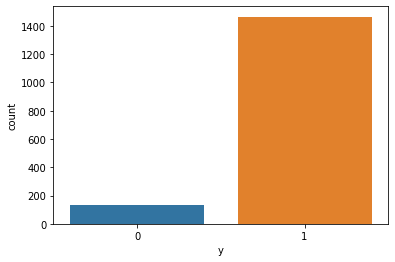

In [ ]:
import seaborn as sns

sns.countplot(x = "y", data = df_temp)
plt.show()

In [ ]:
df_temp2 = df_temp[(df_temp['rating'] == '5')]

In [ ]:
positive = list(df_temp2[(df_temp2['review_text'].str.len() > 100) & (df_temp2['review_text'].str.len() < 350)]['review_text'])
len(positive)

67

In [ ]:
!pip install nlpaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 410 kB 5.3 MB/s 


In [ ]:
import nlpaug.augmenter.word as naw

We used Python’s NLPAug to do the data augmentation task. First, we choose positive reviews of 100-350 character lengths which were 67. 

In [ ]:
# print positive()

In [ ]:
positive[40:49]

['Strong built quality.\n Supports super fast charging on my Samsung S21 FE.\n Full charge in less than an hour.\n Type C to Type C cable is not provided with the box.\n Compact design but bit heavy.\n Got the product at Rs 999/- during sale.',
 'product is good and also work with type C cables of i phone solid build quality 25 w super fast charger for samsung mobile',
 'Really super with fast charging for my m53 5g mobile ðŸ“±. . original Samsung product received.... thank you ðŸ˜Š',
 "One of the best decisions I've made is to buy this for my Galaxy S20, works very well. Don't be disheartened by the price, you don't need to spend much on the cable zuuc has good braided cables for around 350rs which supports upto 65w.",
 'Works well. Does not come with cable and the cable which comes in Samsung galaxy box with phone does not work with this adapter. So better get Adapter + Cable.',
 'Strong built quality.\n Supports super fast charging on my Samsung S21 FE.\n Full charge in less than an

In [ ]:
aug = naw.AntonymAug(name='Antonym_Aug', aug_min=1, aug_max=10, aug_p=0.3, lang='eng', stopwords=en_stopwords, tokenizer=None, reverse_tokenizer=None, stopwords_regex=None, verbose=0)
aug_negative = aug.augment(positive)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
print(df)

            product_id                                       product_name  \
0           B085J1J32G  Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...   
1           B085J1J32G  Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...   
2           B085J1J32G  Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...   
3           B085J1J32G  Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...   
4           B085J1J32G  Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...   
5           B089MQ622N     Samsung Galaxy M01 Core (Black, 2GB RAM, 32GB)   
6           B089MQ622N     Samsung Galaxy M01 Core (Black, 2GB RAM, 32GB)   
7           B089MQ622N     Samsung Galaxy M01 Core (Black, 2GB RAM, 32GB)   
8           B089MQ622N     Samsung Galaxy M01 Core (Black, 2GB RAM, 32GB)   
9           B089MQ622N     Samsung Galaxy M01 Core (Black, 2GB RAM, 32GB)   
10          B07X8V5YKR  Samsung Galaxy Note10 Lite (Aura Glow, 6GB RAM...   
11          B07X8V5YKR  Samsung Galaxy Note10 Lite (Aura Glow, 6GB RAM...   

for training dataset we can use random forrest regression. 